# Demo Notebook

This note book walk through the steps for generating components in TIME sim data cube,which includes:

* CII & CO lines: from SIDES

* CIB: from SIDES

* CMB: Gaussian random maps from power specturm

* Atomosphere: using atm spectrum from "kp_50deg_0.47", no spatial variation considered

* Noise: generate random noise with noise per channel NEI from "20171101_baseline_kp_0.6fudge_nei.txt"


Sides data covers 1.4 x 1.4 deg^2, so we can make ~ 200 sims of TIME-sized data (~1 deg x 0.5 arcsec)

Making lines and CIB is slow since they require reading in the sides data frame. Can consider run it once and save the data for further applications.

## CII & CO lines

In [1]:
from survey_params import *
from catalog_process import *
from Icube_line import *

In [2]:
df = get_cat_df()

In [3]:
df.head()

,redshift,ra,dec,Mhalo,Mstar,qflag,SFR,issb,mu,Dlum,Umean,ICO10,ICO21,ICO32,ICO43,ICO54,ICO65,ICO76,ICO87,ICII
0,0.027082,1.386314,0.578664,9.755162e+11,1.166001e+10,False,1.324312,False,1.009967,122.324178,7.950225,0.005794,0.027047,0.046860,0.074952,0.097787,0.076834,0.054905,0.034384,4.018717
1,0.029516,0.454959,1.145274,9.693363e+11,2.612670e+10,True,0.000000,False,0.990316,133.557339,3.389284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.028948,0.653517,1.053531,3.458112e+11,4.891516e+09,False,0.735010,False,1.005078,130.932469,1.760184,0.003124,0.014058,0.021556,0.025617,0.021868,0.020619,0.016401,0.011247,1.532164
3,0.027158,0.931048,0.651234,3.478761e+11,1.876074e+09,True,0.000000,False,0.991294,122.674335,1.651066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.028611,0.787421,0.940826,3.362242e+11,1.672992e+09,False,0.408701,False,0.996016,129.376111,3.652162,0.001971,0.008982,0.014390,0.019310,0.020362,0.017436,0.013157,0.008647,0.684615


In [4]:
df.describe()

,redshift,ra,dec,Mhalo,Mstar,SFR,mu,Dlum,Umean,ICO10,ICO21,ICO32,ICO43,ICO54,ICO65,ICO76,ICO87,ICII
count,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06
mean,2.734982e+00,7.039533e-01,6.972193e-01,1.064088e+11,9.092136e+08,1.364242e+00,9.542350e-01,2.400558e+04,2.970771e+01,4.281309e-07,2.025827e-06,3.656707e-06,6.313149e-06,8.842023e-06,6.767389e-06,4.748480e-06,2.922661e-06,7.486194e-04
std,1.484305e+00,4.041831e-01,4.038262e-01,7.740619e+11,7.074330e+09,1.223219e+01,2.590634e-01,1.522744e+04,2.374723e+01,8.417621e-06,3.906495e-05,6.664075e-05,1.045195e-04,1.358849e-04,1.067030e-04,7.631966e-05,4.788468e-05,2.022393e-02
min,2.546800e-02,0.000000e+00,0.000000e+00,7.618732e+07,1.000001e+07,0.000000e+00,1.049018e-01,1.148970e+02,8.762903e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.510976e+00,3.536190e-01,3.476190e-01,2.057080e+10,1.645674e+07,2.568487e-02,8.844121e-01,1.129854e+04,1.213165e+01,6.176004e-09,3.190388e-08,7.051000e-08,1.560011e-07,2.542979e-07,1.851327e-07,1.249639e-07,7.387210e-08,6.623151e-07
50%,2.750341e+00,7.054865e-01,6.967940e-01,3.748378e+10,3.332762e+07,7.085676e-02,9.622080e-01,2.345478e+04,2.318013e+01,1.832199e-08,9.210884e-08,1.928823e-07,4.037485e-07,6.392470e-07,4.696870e-07,3.194167e-07,1.903368e-07,2.308439e-06
75%,3.610307e+00,1.054712e+00,1.044422e+00,7.359735e+10,1.119962e+08,2.492406e-01,1.009248e+00,3.249175e+04,4.035804e+01,7.716027e-08,3.776141e-07,7.416129e-07,1.436178e-06,2.165130e-06,1.617552e-06,1.113424e-06,6.722135e-07,1.266037e-05
max,9.993294e+00,1.400000e+00,1.400000e+00,4.190855e+14,3.997949e+11,9.964687e+02,7.472722e+01,1.060595e+05,5.301824e+02,8.342091e-03,3.836514e-02,6.340662e-02,9.172387e-02,1.070304e-01,8.785595e-02,6.460447e-02,4.152574e-02,1.506822e+01


zmin < 0 !!


Text(0, 0.5, 'I [Jy/sr]')

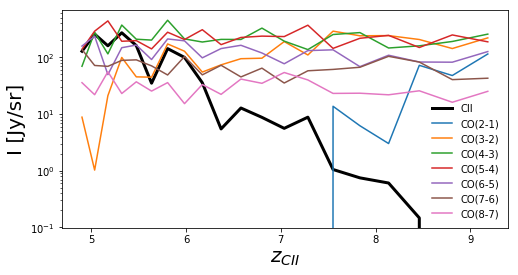

In [5]:
# line mean intensity in 0.25 x 0.25 deg

time_par = TIME_param(survey_shape='cube')

dx=15 # arcmin
dy=15
Nx=1
Ny=1
Nbins = 20
nu_binedges = np.linspace(time_par.nu_min, time_par.nu_max, Nbins+1)

datacube = make_Icube_line(df, Nx, Ny, dx, dy, nu_binedges)

# get intensity
z_arr = np.zeros([9,Nbins])
I_arr = np.zeros([9,Nbins])
Icii_arr, Ncii_arr = datacube.make_line_cube('cii')
I_arr[0,:] = np.mean(np.mean(Icii_arr,axis=0),axis=0)
z_arr[0,:] = datacube.zbins

for jco in range(2,9,1):
    Ico_arr, Nco_arr = datacube.make_line_cube('co',jco = jco)
    I_arr[jco,:] = np.mean(np.mean(Ico_arr,axis=0),axis=0)
    z_arr[jco,:] = datacube.zbins

# plot I - as a function of z

fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(z_arr[0,:], I_arr[0,:],label='CII', c='k', lw = 3)
for jco in range(2,9,1):
    ax.plot(z_arr[0,:], I_arr[jco,:],label='CO({}-{})'.format(jco,jco-1))
ax.set_yscale('log')
ax.legend(loc=0, frameon = False)
ax.set_xlabel('$z_{CII}$', fontsize = 20)
ax.set_ylabel('I [Jy/sr]', fontsize = 20)

In [7]:
# print data cube info

time_par = TIME_param(survey_shape='cube')
datacube = make_Icube_line(df, time_par.Nx, time_par.Ny, time_par.dth, time_par.dth, time_par.nu_binedges)
datacube.info('cii',6)

data cube info:
180 x 180 x 60 voxels [ra, dec, LoS]
z (center) = 6.86, z range = [4.84, 9.38] for CII

survey size:
1.29e+00 x 1.29e+00 deg (7.74e+01 x 7.74e+01 arcmin) x 1.42e+02 GHz
1.34e+02 x 1.34e+02 x 1.11e+03 [Mpc/h]

voxel size (survey center voxel at z = 6.855359):
7.17e-03 x 7.17e-03 deg (4.30e-01 x 4.30e-01 arcmin) x 2.34e+00 GHz
7.43e-01 x 7.43e-01 x 1.89e+01 [Mpc/h]


In [7]:
# make CII & CO intensity cube 180 x 180 x 60 and save
from survey_params import *
from catalog_process import *

time_par = TIME_param(survey_shape='cube')

#df = get_cat_df()
datacube = make_Icube_line(df, time_par.Nx, time_par.Ny, time_par.dth, time_par.dth, time_par.nu_binedges)

Icii_arr, Ncii_arr = datacube.make_line_cube('cii')
# np.save('Icube/Icii_arr', Icii_arr)
# np.save('Icube/Ncii_arr', Ncii_arr)

for jco in range(2,9,1):
    Ico_arr, Nco_arr = datacube.make_line_cube('co',jco = jco)
#     np.save('Icube/Ico' + str(jco) + '_arr', Ico_arr)
#     np.save('Icube/Nco' + str(jco) + '_arr', Nco_arr)

zmin < 0 !!


## CIB continuum

In [1]:
from survey_params import *
from catalog_process import *
from Icube_cib import *

zlim SB (when UMS = USB)= 3.169566757993015


In [2]:
df = get_cat_df(return_all=True)

In [3]:
time_par = TIME_param(survey_shape='cube')
datacube = make_Icube_cib(df, time_par.Nx, time_par.Ny, time_par.dth, time_par.dth, time_par.nu_binedges)

In [4]:
Icib_arr = datacube.make_cib_cube(verbose = 1)
clear_output()
# np.save('Icube/Icib_arr', Icib_arr)

Text(0.5, 1.0, '$\\lambda$ = 1100 $\\mu$m CIB map')

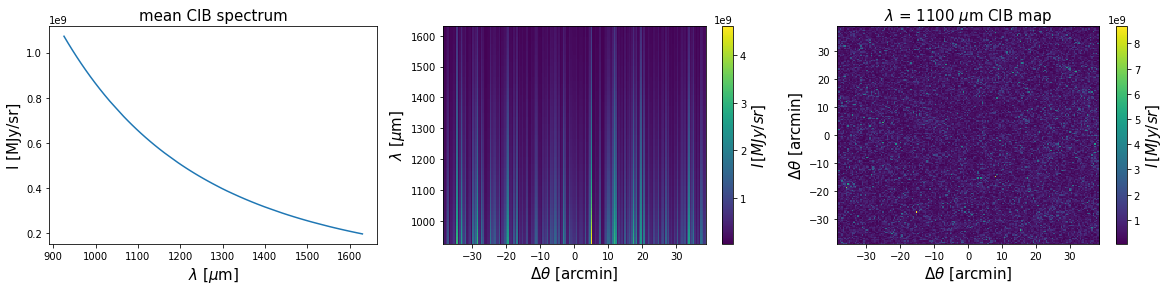

In [7]:
# plot CIB spectrum

lambda_bins = (const.c / (time_par.nu_bins * u.GHz)).to(u.um).value # [um]

fig, ax = plt.subplots(1,3,figsize=(20,4))
ax[0].plot(lambda_bins,np.mean(Icib_arr, axis = (0,1)) * 1e-6)
ax[0].set_xlabel(r'$\lambda$ [$\mu$m]',fontsize=15)
ax[0].set_ylabel(r'I [MJy/sr]',fontsize=15)
ax[0].set_title(r'mean CIB spectrum',fontsize=15)

Icib_2D = np.squeeze(Icib_arr[:, round(datacube.Ny/2), :].T) * 1e-6
ext_value_x = datacube.Nx * datacube.dx / 2
ext = [-ext_value_x,ext_value_x,min(datacube.lambda_bins),max(datacube.lambda_bins)]
im1 = ax[1].imshow(Icib_2D,origin='lower', extent=ext, aspect = 'auto')
ax[1].set_xlabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
ax[1].set_ylabel(r'$\lambda$ [$\mu$m]',fontsize=15)
cb1 = plt.colorbar(im1, ax = ax[1])
cb1.set_label(r'$I\,[MJy/sr]$',fontsize=15)

Icib_2D = np.squeeze(Icib_arr[:, :, 16].T) * 1e-6
ext_value_x = datacube.Nx * datacube.dx / 2
ext = [-ext_value_x,ext_value_x,-ext_value_x,ext_value_x]
im1 = ax[2].imshow(Icib_2D,origin='lower', extent=ext, aspect = 'auto')
ax[2].set_xlabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
ax[2].set_ylabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
cb1 = plt.colorbar(im1, ax = ax[2])
cb1.set_label(r'$I\,[MJy/sr]$',fontsize=15)
ax[2].set_title(r'$\lambda$ = 1100 $\mu$m CIB map',fontsize=15)

## CMB

In [1]:
from survey_params import *
from Icube_cmb import *

time_par = TIME_param(survey_shape='cube')

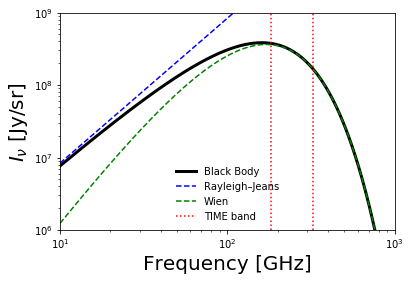

In [2]:
# CMB BB spectrum

nu_arr = np.logspace(1,3,1000) * u.GHz

x = (const.h * nu_arr / const.k_B / cosmo.Tcmb0).decompose().value
Ibb_arr = 2 * const.h * nu_arr**3 / const.c**2 / (np.exp(x) - 1) / u.sr
Irj_arr = 2 * nu_arr**2 * const.k_B * cosmo.Tcmb0 / const.c**2 / u.sr
Iwien_arr = 2 * const.h * nu_arr**3 / const.c**2 * np.exp(-x) / u.sr

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(nu_arr.to(u.GHz), Ibb_arr.to(u.Jy/u.sr), 'k', lw = 3, label = 'Black Body')
ax.plot(nu_arr.to(u.GHz), Irj_arr.to(u.Jy/u.sr), 'b--',label = 'Rayleigh–Jeans')
ax.plot(nu_arr.to(u.GHz), Iwien_arr.to(u.Jy/u.sr), 'g--',label = 'Wien')
ax.axvline(time_par.nu_min, c='r', ls=':',label='TIME band')
ax.axvline(time_par.nu_max, c='r', ls=':')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency [GHz]', fontsize = 20)
ax.set_ylabel(r'$I_{\nu}$ [Jy/sr]', fontsize = 20)
ax.set_ylim([1e6,1e9])
ax.set_xlim([1e1,1e3])
ax.legend(loc=0, frameon = False)

In [3]:
# run CMB sim cube

cmb_class = CMB_sim_tools(time_par)
cmb_class.gen_CMB_map()
cmb_class.make_CMB_cube()
# np.save('Icube/Icmb_arr', cmb_class.Icmb_arr)

Text(0.5, 1.0, 'CMB Intensity')

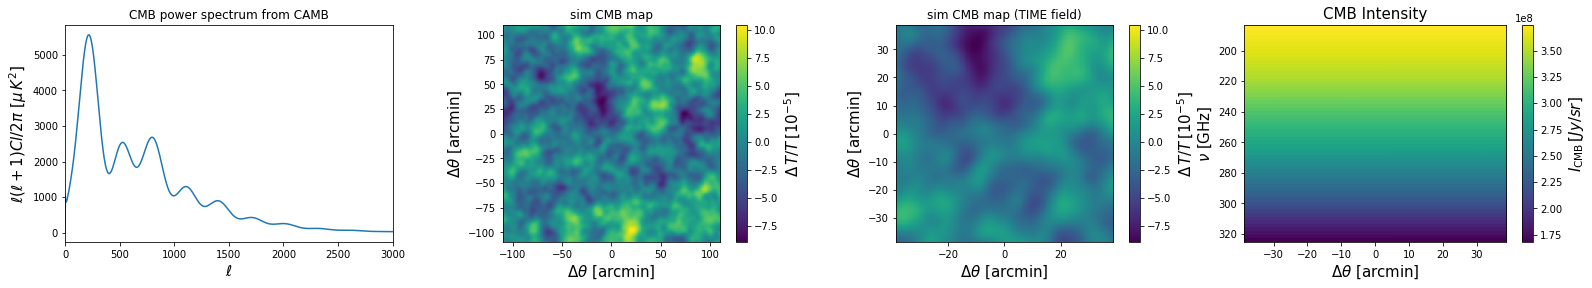

In [4]:
# plot the results
fig, ax = plt.subplots(1,4,figsize=(27,4))

lmax=3000
[l_arr,Cl_arr] = cmb_class.get_CMB_Cl(ell_arr = np.arange(lmax), unit = 'muK')
ax[0].plot(l_arr,l_arr*(l_arr+1)*Cl_arr/2/np.pi)
ax[0].set_xlabel('$\ell$', fontsize=15)
ax[0].set_ylabel('$\ell(\ell+1)Cl/2\pi$ [$\mu\,K^2$]', fontsize=15)  
ax[0].set_xlim([0,lmax])
ax[0].set_title('CMB power spectrum from CAMB')

ext_value = cmb_class.cmb_map_large.shape[0] * cmb_class.dth  / 2
ext = [-ext_value,ext_value,-ext_value,ext_value]
im1 = ax[1].imshow(cmb_class.cmb_map_large*1e5,origin='lower', extent=ext)
ax[1].set_xlabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
ax[1].set_ylabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
cb1 = plt.colorbar(im1, ax = ax[1])
cb1.set_label('$\Delta\, T/T\,[10^{-5}]$',fontsize=15)
ax[1].set_title('sim CMB map')

ext_value_x = cmb_class.Nx * cmb_class.dth / 2
ext_value_y = cmb_class.Ny * cmb_class.dth / 2
ext = [-ext_value_x,ext_value_x,-ext_value_y,ext_value_y]
im2 = ax[2].imshow(cmb_class.cmb_map*1e5,origin='lower', extent=ext, vmin =cb1.vmin, vmax =cb1.vmax)
ax[2].set_xlabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
ax[2].set_ylabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
cb2 = plt.colorbar(im2, ax = ax[2])
cb2.set_label('$\Delta\, T/T\,[10^{-5}]$',fontsize=15)
ax[2].set_title('sim CMB map (TIME field)')

Icmb_2D = np.squeeze(cmb_class.Icmb_arr[:, round(cmb_class.Ny/2), :].T)
ext_value_x = cmb_class.Nx * cmb_class.dth / 2
ext = [-ext_value_x,ext_value_x,cmb_class.nu_max,cmb_class.nu_min]
im1 = ax[3].imshow(Icmb_2D,origin='lower', extent=ext, aspect = 'auto')
ax[3].set_xlabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
ax[3].set_ylabel(r'$\nu$ [GHz]',fontsize=15)
cb1 = plt.colorbar(im1, ax = ax[3])
cb1.set_label(r'$I_{\rm CMB}\,[Jy/sr]$',fontsize=15)
ax[3].set_title('CMB Intensity', fontsize = 15)

## Atmosphere Model

In [5]:
from survey_params import *
from Icube_atm import *

time_par = TIME_param(survey_shape='cube')
atm_cube = atm_sim_tools(time_par)
atm_cube.make_atm_cube()

# np.save('Icube/Iatm_arr', atm_cube.Icube_arr)

Text(0.5, 1.0, 'Atmosphere Intensity')

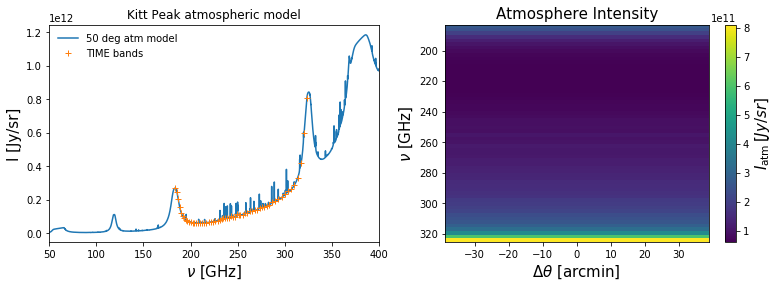

In [6]:
# plot atm spectrum

nu_dat, I_dat = atm_cube.get_atm_spec(unit='Jy/sr')

fig, ax = plt.subplots(1,2,figsize=(13,4))
ax[0].plot(nu_dat,I_dat,label='50 deg atm model')
ax[0].plot(atm_cube.nu_bins,atm_cube.I_vec,'+',label = 'TIME bands')
ax[0].set_xlabel(r'$\nu$ [GHz]',fontsize=15)
ax[0].set_ylabel(r'I [Jy/sr]',fontsize=15)
ax[0].set_title('Kitt Peak atmospheric model')
ax[0].set_xlim([50,400])
ax[0].legend(loc=0, fontsize = 10, frameon = False)

Iatm_2D = np.squeeze(atm_cube.Icube_arr[:, round(atm_cube.Ny/2), :].T)
ext_value_x = atm_cube.Nx * atm_cube.dth / 2
ext = [-ext_value_x,ext_value_x,atm_cube.nu_max,atm_cube.nu_min]
im1 = ax[1].imshow(Iatm_2D,origin='lower', extent=ext, aspect = 'auto')
ax[1].set_xlabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
ax[1].set_ylabel(r'$\nu$ [GHz]',fontsize=15)
cb1 = plt.colorbar(im1, ax = ax[1])
cb1.set_label(r'$I_{\rm atm}\,[Jy/sr]$',fontsize=15)
ax[1].set_title('Atmosphere Intensity', fontsize = 15)

## Instruemental Noise

In [1]:
from survey_params import *
from instr_noise import *

time_par = TIME_param(survey_shape='cube')
noise_class = time_instr_noise()
noise_cube = noise_class.sim_noise_3D(time_par.Nx, time_par.Ny)
# np.save('Icube/Inoise_arr', noise_cube)

Text(0.5, 1.0, 'Noise Intensity')

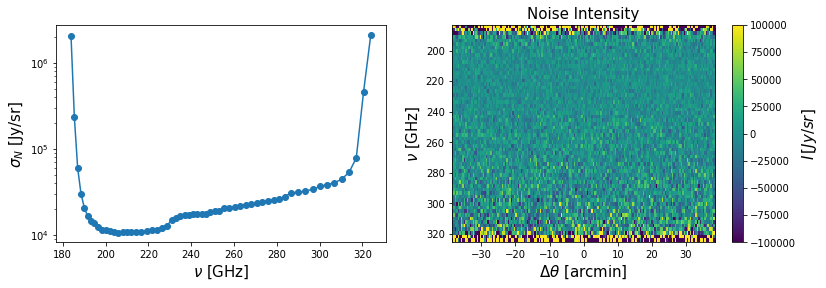

In [2]:
# plot noise map

fig, ax = plt.subplots(1,2,figsize=(13,4))
ax[0].plot(noise_class.nu_bins,noise_class.sig_noise,'o-')
ax[0].set_xlabel(r'$\nu$ [GHz]',fontsize=15)
ax[0].set_ylabel(r'$\sigma_N$ [Jy/sr]',fontsize=15)
ax[0].set_yscale('log')

Inoise_2D = np.squeeze(noise_cube[:, round(time_par.Ny/2), :].T)
ext_value_x = time_par.Nx * time_par.dth / 2
ext = [-ext_value_x,ext_value_x,time_par.nu_max,time_par.nu_min]
im1 = ax[1].imshow(Inoise_2D,origin='lower', extent=ext, aspect = 'auto', vmin = -1e5, vmax = 1e5)
ax[1].set_xlabel(r'$\Delta \theta$ [arcmin]',fontsize=15)
ax[1].set_ylabel(r'$\nu$ [GHz]',fontsize=15)
cb1 = plt.colorbar(im1, ax = ax[1])
cb1.set_label(r'$I\,[Jy/sr]$',fontsize=15)
ax[1].set_title('Noise Intensity', fontsize = 15)

### Make a Point source map

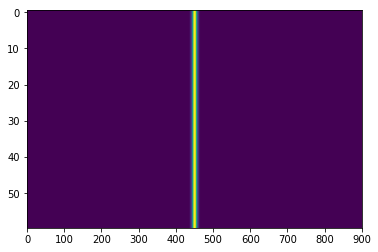

In [3]:
#
from survey_params import *
from instr_noise import *

time_par = TIME_param(survey_shape='cube')
Nfine = 5
Ndat = time_par.Nx * Nfine
dth = time_par.dth / Nfine

x_vec = np.arange(Ndat)
x_cent = 450
sigma = Nfine
y_vec = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x_vec - x_cent)**2 / 2 / sigma**2)

Icube_arr = np.zeros([Ndat, time_par.Nnu])
for idx,iI in enumerate(y_vec):
    Icube_arr[idx,:] = iI
plt.imshow(Icube_arr.T, aspect = 'auto')

# Power spectrum

In [9]:
from power_spec_tool import *
from survey_params import *
from Icube_cmb import *

# generate a TIME-like CMB data 'cube': 
# same resolution, spectral binning as TIME, but the map size is 180 x 180 pixel, not 180 x1

time_par = TIME_param(survey_shape = 'cube')
scibands = time_par.science_band

cmb_class = CMB_sim_tools(time_par)
cmb_class.gen_CMB_map()
cmb_class.make_CMB_cube()

cmb3D = cmb_class.Icmb_arr # CMB data cube 180x180x60 in [Jy/sr]

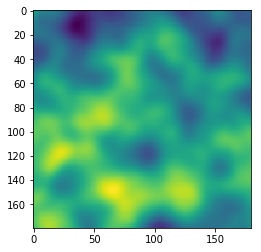

In [13]:
# show the map in the first channel
plt.imshow(cmb3D[...,0])

In [22]:
# take the power spectrum of this map

dth = time_par.dth * u.arcmin.to(u.rad)

# this is the 2D power spectrum P(kx, ky) [Jy^2/sr]
P2D, kx_vec, ky_vec, N2D = power_spec_2D(cmb3D[...,0], cmb3D[...,0], dth, dth)

# get 1D power spectrum from 2D
P1D, kbins, N1D = PS2D_to_PS1D(P2D, kx_vec, ky_vec, N2D, nbins = 20, logbin=True)

Text(0.5, 0, '1/rad')

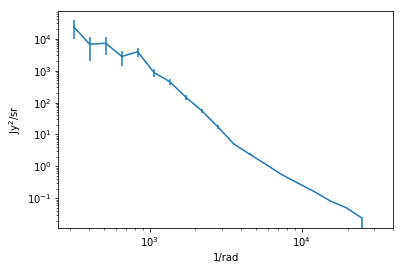

In [26]:
# plot the 1D power spectrum

plt.errorbar(kbins, P1D, P1D/np.sqrt(N1D))
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'Jy$^2$/sr')
plt.xlabel(r'1/rad')